<a href="https://colab.research.google.com/github/AaronARdz/TextDataVisualization/blob/main/Entropy_of_written_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Entropy in information theory:
# "Surprising" the more unpredictable a signal is, the more information it can convey,therefore higher entropy

# 2. Remove formatting characters
# 3. Split the text into words and show the frequencies of word lengths.
# 4. Show the frequencies of letters.
# 5. Compute entropy of each letter.
# 6. Compute lag-1 conditional entropy

In [ ]:
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import string

In [ ]:
book = requests.get('http://www.gutenberg.org/files/35/35-0.txt')
text = book.text
text[:2000] # print first 2000 characters

"ï»¿The Project Gutenberg EBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and most\r\nother parts of the world at no cost and with almost no restrictions\r\nwhatsoever.  You may copy it, give it away or re-use it under the terms of\r\nthe Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org.  If you are not located in the United States, you'll have\r\nto check the laws of the country where you are located before using this ebook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [EBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV Time T

In [ ]:
# character strings to replace with space
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing,
                 'ï»'
                 ]

In [ ]:
for string2match in strings2replace:
  regexp = re.compile(r'%s'%string2match)
  text = regexp.sub(' ',text)

text[:2000]

" ¿The Project Gutenberg EBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org.  If you are not located in the United States, you'll have to check the laws of the country where you are located before using this ebook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [EBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8  *** START OF THIS PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks 

In [ ]:
words = text.split()

print(len(words))
words[:50]

35859


['¿The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Time',
 'Machine,',
 'by',
 'H.',
 'G.',
 'Wells',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever.',
 'You',
 'may',
 'copy',
 'it,',
 'give',
 'it',
 'away',
 'or',
 're-use']

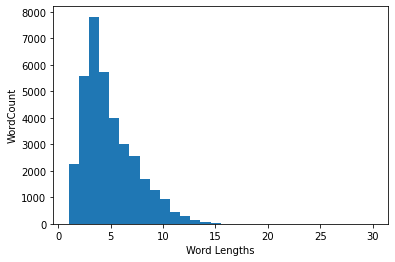

In [ ]:
# create a distribution of the words
wordlengths = np.zeros(len(words))

for wordi in range(len(words)):
  wordlengths[wordi] = len(words[wordi])

plt.hist(wordlengths,bins=30)
plt.xlabel('Word Lengths')
plt.ylabel('WordCount')
plt.show()

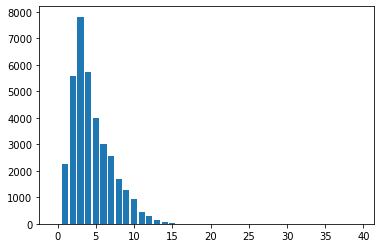

In [ ]:
wordcounts = np.zeros(40)

for wrd in words:
  wordcounts[len(wrd)] += 1

plt.bar(range(len(wordcounts)),wordcounts)
plt.show()

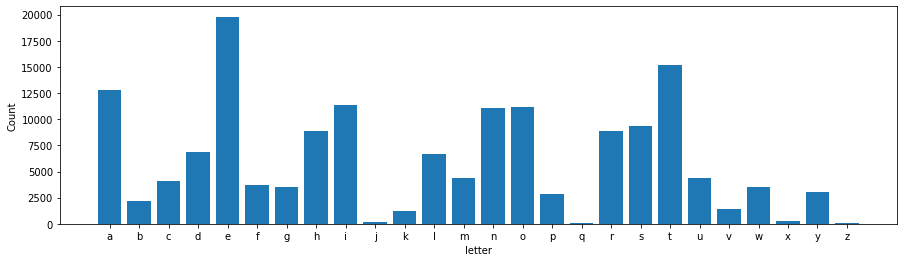

In [ ]:
# frecuency of letters
letters = string.ascii_lowercase
numletters = len(letters)
lettercounts = np.zeros(numletters)

n = 0

for i in letters:
  lettercounts[n] = text.lower().count(i)
  n += 1

fig, ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(numletters),lettercounts)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel('letter')
ax.set_ylabel('Count')
plt.show()

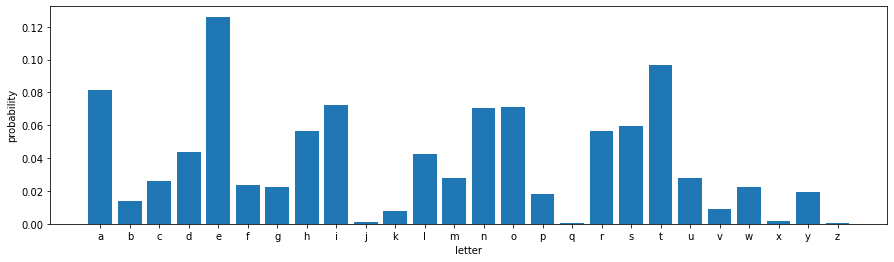

In [ ]:
letterprob = lettercounts / sum(lettercounts)

# letterprob should be 1 at this point

fig, ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(numletters),letterprob)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel('letter')
ax.set_ylabel('probability')
fig; #holds figure in memory, so we can add stuff later

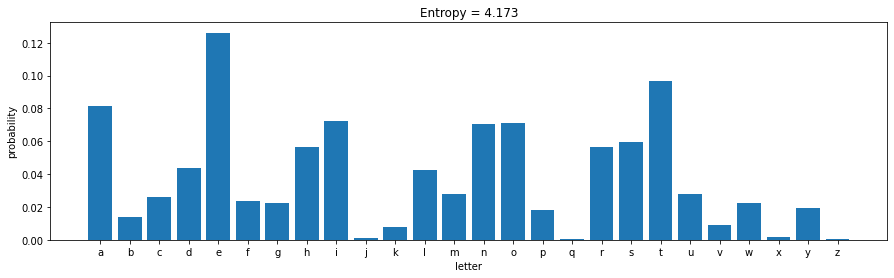

In [ ]:
entropy = -sum(letterprob * np.log2(letterprob + np.finfo(float).eps))
entropy

# 0 * np.log2(0 + 0.0000000001)
# 0 * np.log2(0 + np.finfo(float).eps)

ax.set_title('Entropy = %.3f'%entropy)
fig

In [ ]:
# Conditional (sequence) entropy 

probmat = np.zeros((numletters,numletters))

for i in range(len(text)-1):
  currlet = text[i]
  nextlet = text[i+1]
  if currlet in letters and nextlet in letters:
    probmat[letters.index(currlet),letters.index(nextlet)] += 1

In [ ]:
letters.index('m')

12

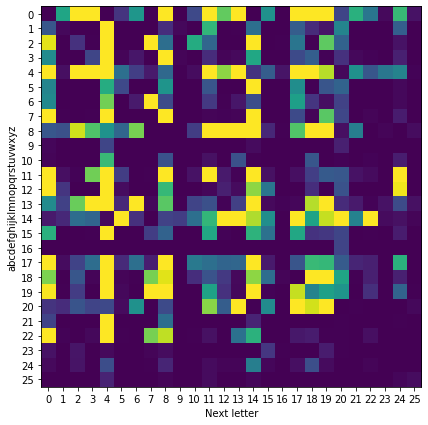

In [ ]:
fig,ax = plt.subplots(1,figsize=(7,7))

ax.imshow(probmat,vmax=500)
ax.set_ylabel('Current letter')
ax.set_xlabel('Next letter')
ax.set_xticks(range(numletters))
ax.set_yticks(range(numletters))
ax.set_ylabel(letters)
ax.set_ylabel(letters)
plt.show()

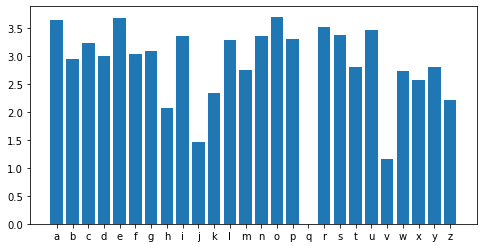

In [ ]:
conditional_entropy = np.zeros(numletters)

for i in range(numletters):
  probs = probmat[i,:]
  probs = probs / sum(probs)
  conditional_entropy[i] = -sum( probs  * np.log2(probs + np.finfo(float).eps))

fig,ax = plt.subplots(1,figsize=(8,4))
ax.bar(range(numletters),conditional_entropy)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
plt.show()


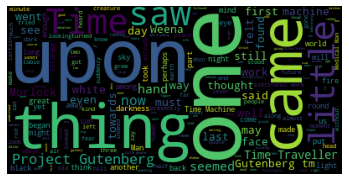

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()